In [1]:
#Importing necessary libraries and packages
import pandas as pd 
import numpy as np 

import seaborn as sns              # For Visualization 
import matplotlib.pyplot as plt    # ploting package
%matplotlib inline
import matplotlib.ticker as plticker


import warnings                    # Filtering warnings
warnings.filterwarnings('ignore')

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Importing dataset excel file using pandas.
df=pd.read_csv('Rating_Prediction_dataset.csv') 

In [3]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head()

No. of Rows : 31095
No. of Columns : 3


,Unnamed: 0,Product_Review,Ratings
0,0,Overall Laptop is good just got it in hands wi...,4.0
1,1,Evening things is fine accept Mac cafe antivir...,4.0
2,2,Best product.,4.0
3,3,battery life- Not up to notch.No backlit keybo...,3.0
4,4,Battery is not upto the mark. Battery reduce v...,3.0


In [4]:
# Dropping unnecssary index column Unnamed:0 
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.info() #Checking the datatype of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31095 entries, 0 to 31094
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_Review  30259 non-null  object 
 1   Ratings         31095 non-null  float64
dtypes: float64(1), object(1)
memory usage: 486.0+ KB


There are some missing value in product review

The datatype of Product review is object while datatypes of Ratings is float

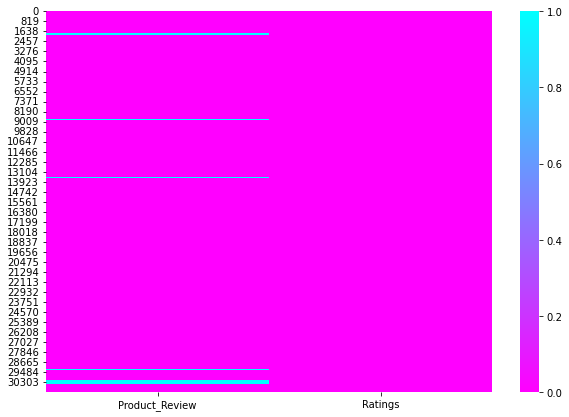

Product_Review    836
Ratings             0
dtype: int64

In [6]:
import matplotlib.pyplot as plt # ploting package

plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()
df.isnull().sum()

We will replace missing value in product reviews with 'Review Not Available'

In [7]:
# Replacing missing data with 'Review Not Available' using pandas fillna()
df['Product_Review'].fillna('Review Not Available',inplace=True)

In [8]:
df.isnull().sum().any()  #Checking after filling them

False

No missing values are present

Exploration of Target Variable Ratings

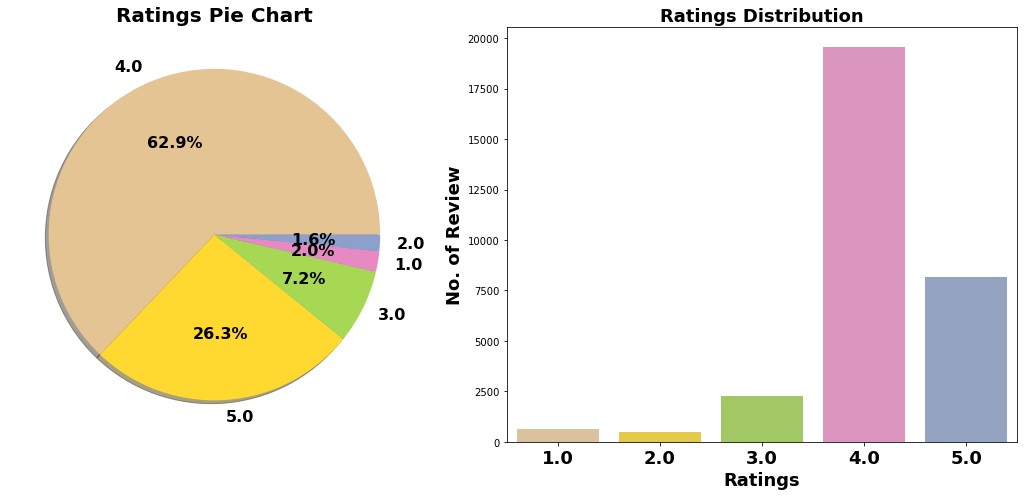

Value Counts of Rating:


4.0    19556
5.0     8167
3.0     2250
1.0      622
2.0      500
Name: Ratings, dtype: int64

In [9]:
# Pie & Count plot of Ratings
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
f,ax=plt.subplots(1,2,figsize=(15,7))
df['Ratings'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Ratings Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Ratings',data=df,ax=ax[1])
ax[1].set_title('Ratings Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Ratings",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Review",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()
print('Value Counts of Rating:')
df['Ratings'].value_counts()

In [10]:
# Average Rating given by user
print("Average rating given by users is " + str(df['Ratings'].mean()))

Average rating given by users is 4.098118668596237


Comment :
1. Around 49% customer given 5- star rating followed by 22.5% customer given lowest 1-star rating.

2. Average Rating is 4.11.

Text Mining
Operation perform are as followed:

Removing Punctuations and other special characters

Word Tokenzation

Removing Stop Words

Stemming and Lemmatising

Applying Count Vectoriser

Importing required libraries for Text mining

In [11]:
#Importing required libraries
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

Applying Regular expression for text extraction.

In [12]:
def clean_text(df, df_column_name):
    
    #Converting all messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    #Replace email addresses with 'email'
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))


In [13]:
#Calling the class
clean_text(df, 'Product_Review')
df['Product_Review'].tail(3)

31092    need refill cartridge everyday hardly gives nu...
31093                         amazing super thank filpkart
31094                      nice good quality printer canon
Name: Product_Review, dtype: object

Data Tokenization using RegexpTokenizer

In [14]:
#Tokenizing the data using RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['Product_Review'] = df['Product_Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head()

,Product_Review,Ratings
0,"[overall, laptop, good, got, hands, write, ful...",4.0
1,"[evening, things, fine, accept, mac, cafe, ant...",4.0
2,"[best, product]",4.0
3,"[battery, life, notch, backlit, keyboardno, su...",3.0
4,"[battery, upto, mark, battery, reduce, faster,...",3.0


Stemming & Lemmatization

In [15]:
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [16]:
#Processing review with above Function
processed_review = []

for doc in df.Product_Review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

31095


[['overal',
  'laptop',
  'good',
  'get',
  'hand',
  'write',
  'full',
  'review',
  'numbr',
  'day',
  'recommend',
  'devic',
  'pretti',
  'decent',
  'price',
  'rang'],
 ['even',
  'thing',
  'fine',
  'accept',
  'mac',
  'cafe',
  'antivirus',
  'one',
  'month',
  'one',
  'year'],
 ['best', 'product']]

In [17]:
df['clean_review']=processed_review  #Assigning this to the dataframe
df.head()

,Product_Review,Ratings,clean_review
0,"[overall, laptop, good, got, hands, write, ful...",4.0,"[overal, laptop, good, get, hand, write, full,..."
1,"[evening, things, fine, accept, mac, cafe, ant...",4.0,"[even, thing, fine, accept, mac, cafe, antivir..."
2,"[best, product]",4.0,"[best, product]"
3,"[battery, life, notch, backlit, keyboardno, su...",3.0,"[batteri, life, notch, backlit, keyboardno, su..."
4,"[battery, upto, mark, battery, reduce, faster,...",3.0,"[batteri, upto, mark, batteri, reduc, faster, ..."


In [18]:
df['Product_Review'] = df['clean_review'].apply(lambda x:' '.join(y for y in x))
df.head()

,Product_Review,Ratings,clean_review
0,overal laptop good get hand write full review ...,4.0,"[overal, laptop, good, get, hand, write, full,..."
1,even thing fine accept mac cafe antivirus one ...,4.0,"[even, thing, fine, accept, mac, cafe, antivir..."
2,best product,4.0,"[best, product]"
3,batteri life notch backlit keyboardno support ...,3.0,"[batteri, life, notch, backlit, keyboardno, su..."
4,batteri upto mark batteri reduc faster functio...,3.0,"[batteri, upto, mark, batteri, reduc, faster, ..."


Plotting wordcloud for different ratings

Word Cloud

Word Cloud is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency.

The more commonly the term appears within the text being analysed, the larger the word appears in the image generated.

The enlarged texts are the most number of words used there and small texts are the less number of words used.

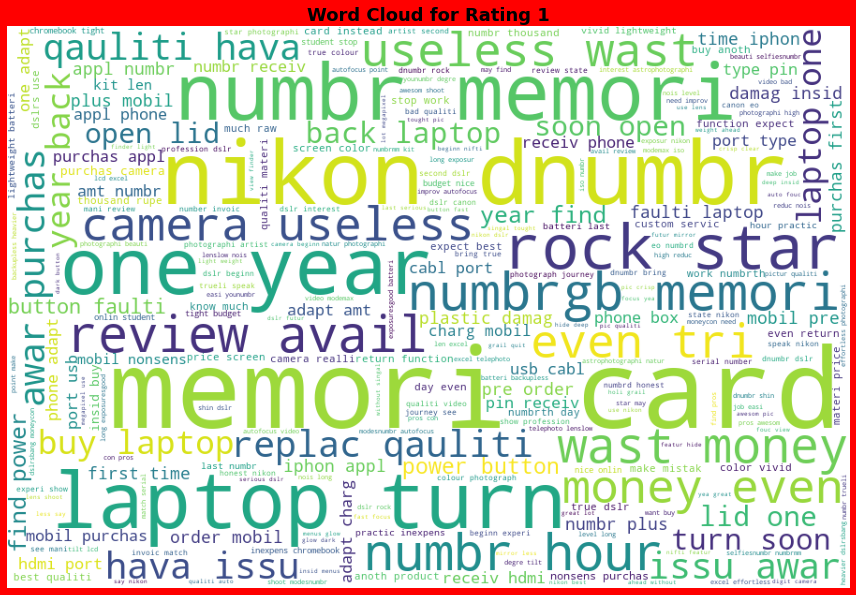

In [19]:
#Getting sense of words in Rating 1
one = df['Product_Review'][df['Ratings']==1.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 1',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

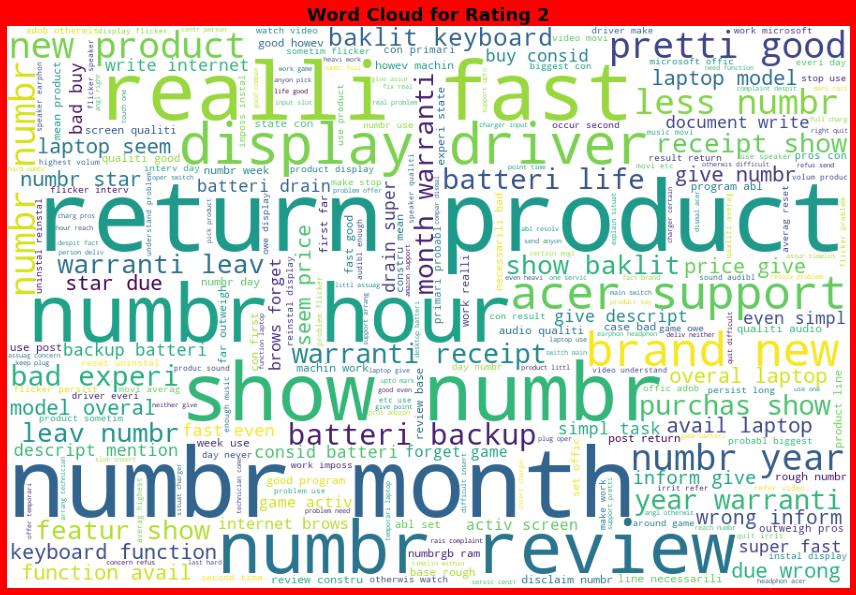

In [20]:
#Getting sense of words in Rating 2
one = df['Product_Review'][df['Ratings']==2.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 2',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

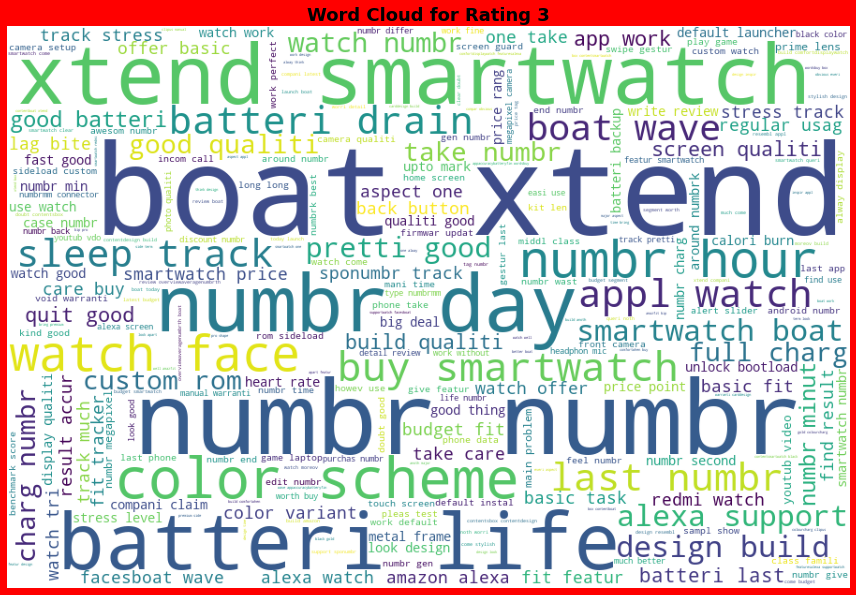

In [21]:
#Getting sense of words in Rating 3
one = df['Product_Review'][df['Ratings']==3.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 3',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

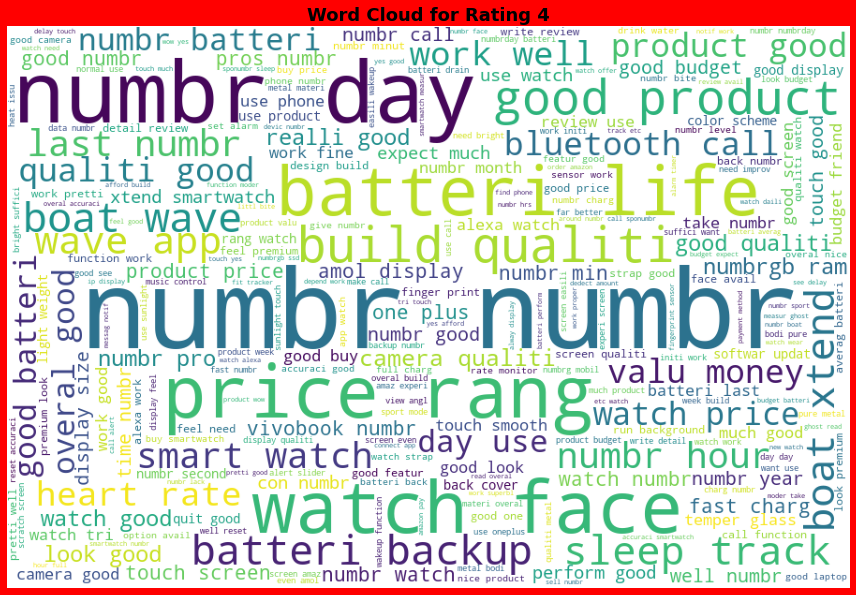

In [22]:
#Getting sense of words in Rating 4
one = df['Product_Review'][df['Ratings']==4.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 4',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

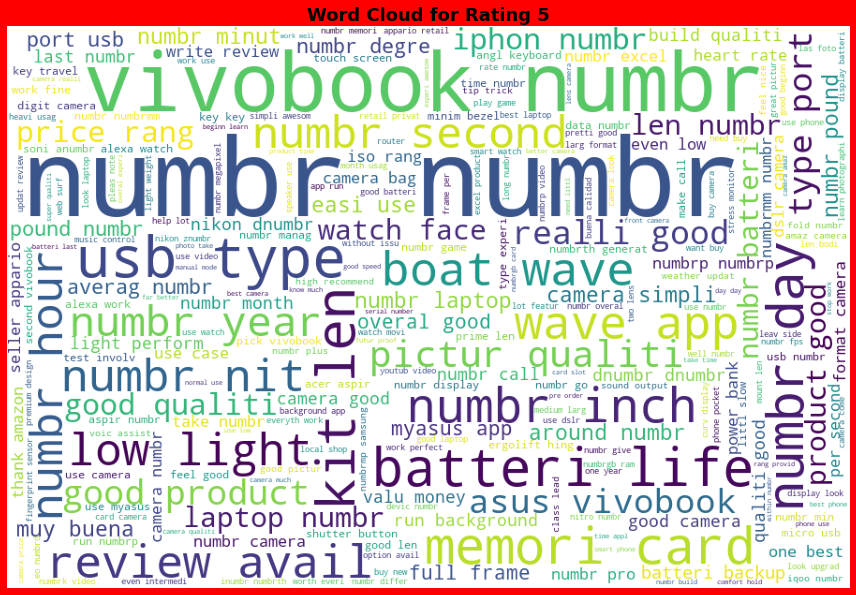

In [23]:
# Getting sense of words in Rating 5
one = df['Product_Review'][df['Ratings']==5.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 5',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

Text Vectorization to convert text into numeric

In [24]:
# Converting text into numeric using TfidfVectorizer
tf = TfidfVectorizer()
features = tf.fit_transform(df['Product_Review'])
X=features
Y=df[['Ratings']]

In [25]:

X.shape

(31095, 4264)

In [26]:
Y.shape


(31095, 1)

Machine Learning Model Building

In [27]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (21766, 4264)
Training target vector size: (21766, 1)
Test feature matrix size: (9329, 4264)
Test target vector size: (9329, 1)


Finding best Random state

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8640797513131097 on Random_state 93


Logistics Regression

In [30]:
# Creating train_test_split using best random_state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=71, test_size=.3)

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=71, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8531461035480759


Confusion matrix of Logistics Regression : 
 [[ 108    0    7    8   84]
 [   0   93    0   25   27]
 [   1    0  435  178   87]
 [  19   12   53 5345  442]
 [  13    0   19  395 1978]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

         1.0       0.77      0.52      0.62       207
         2.0       0.89      0.64      0.74       145
         3.0       0.85      0.62      0.72       701
         4.0       0.90      0.91      0.90      5871
         5.0       0.76      0.82      0.79      2405

    accuracy                           0.85      9329
   macro avg       0.83      0.70      0.75      9329
weighted avg       0.85      0.85      0.85      9329



In [32]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.4473388  0.66554108 0.6378839  0.62952243 0.39041647]
Mean CV Score : 0.5541405370638366
Std deviation : 0.1125323471816441


Decision Tree Classifier

In [33]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.8596848536820667


Confusion matrix of Decision Tree Classifier : 
 [[ 126    0    6    4   71]
 [   0  103    0   25   17]
 [   1    0  452  175   73]
 [  20   12   57 5349  433]
 [  24   12   32  347 1990]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

         1.0       0.74      0.61      0.67       207
         2.0       0.81      0.71      0.76       145
         3.0       0.83      0.64      0.72       701
         4.0       0.91      0.91      0.91      5871
         5.0       0.77      0.83      0.80      2405

    accuracy                           0.86      9329
   macro avg       0.81      0.74      0.77      9329
weighted avg       0.86      0.86      0.86      9329



In [34]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dtc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.33429812 0.63273838 0.57597685 0.55877151 0.29007879]
Mean CV Score : 0.4783727287345233
Std deviation : 0.13858671104231338


Random Forest Classifier

In [35]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.8598992389323614


Confusion matrix of Random Forest Classifier : 
 [[ 125    0    6    4   72]
 [   0  103    0   25   17]
 [   1    0  451  175   74]
 [  20   12   53 5369  417]
 [  23   11   25  372 1974]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

         1.0       0.74      0.60      0.66       207
         2.0       0.82      0.71      0.76       145
         3.0       0.84      0.64      0.73       701
         4.0       0.90      0.91      0.91      5871
         5.0       0.77      0.82      0.80      2405

    accuracy                           0.86      9329
   macro avg       0.82      0.74      0.77      9329
weighted avg       0.86      0.86      0.86      9329



In [36]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.42354076 0.6911079  0.62100016 0.526612   0.30873131]
Mean CV Score : 0.5141984241839525
Std deviation : 0.1365966444862671


AdaBoost Classifier

In [37]:
adbc=AdaBoostClassifier()
adbc.fit(X_train,Y_train)
y_pred=adbc.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.6344731482474005


Confusion matrix of AdaBoost Classifier : 
 [[   0    0    0  199    8]
 [   0    7    0   80   58]
 [   0    0   34  595   72]
 [   0   24   34 5612  201]
 [   0   20    1 2118  266]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       207
         2.0       0.14      0.05      0.07       145
         3.0       0.49      0.05      0.09       701
         4.0       0.65      0.96      0.78      5871
         5.0       0.44      0.11      0.18      2405

    accuracy                           0.63      9329
   macro avg       0.34      0.23      0.22      9329
weighted avg       0.56      0.63      0.54      9329



In [38]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(adbc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score',adbc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score AdaBoostClassifier() :

CVScore : [0.47451359 0.59366458 0.66811384 0.60749317 0.5459077 ]
Mean CV Score : 0.577938575333655
Std deviation : 0.06476892017887395


Gradient Boosting Classifier

In [39]:
grad_bc=GradientBoostingClassifier()
grad_bc.fit(X_train,Y_train)
y_pred=grad_bc.predict(X_test)
print('\033[1m'+'Gradient Boosting Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Gradient Boosting Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Gradient Boosting Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Gradient Boosting Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Gradient Boosting Classifier Evaluation


Accuracy Score of Gradient Boosting Classifier : 0.8380319434022939


Confusion matrix of Gradient Boosting Classifier : 
 [[ 123    0    0   26   58]
 [   0  103    0   35    7]
 [   1    0  416  187   97]
 [  20   12   53 5479  307]
 [  20   11    8  669 1697]]


classification Report of Gradient Boosting Classifier 
               precision    recall  f1-score   support

         1.0       0.75      0.59      0.66       207
         2.0       0.82      0.71      0.76       145
         3.0       0.87      0.59      0.71       701
         4.0       0.86      0.93      0.89      5871
         5.0       0.78      0.71      0.74      2405

    accuracy                           0.84      9329
   macro avg       0.82      0.71      0.75      9329
weighted avg       0.84      0.84      0.83      9329



In [40]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(grad_bc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', grad_bc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score GradientBoostingClassifier() :

CVScore : [0.4143753  0.67036501 0.66071716 0.63917028 0.40392346]
Mean CV Score : 0.5577102428043094
Std deviation : 0.12176414852581588


We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

# Hyper Parameter Tuning : GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
parameter = { 'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [75,100,150]}

In [43]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 1/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.873 total time=  39.3s
[CV 2/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 2/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.858 total time=  39.4s
[CV 3/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 3/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.869 total time=  39.9s
[CV 4/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 4/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.864 total time=  42.3s
[CV 5/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 5/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.868 total time=  47.4s
[CV 1/5; 2/12] STAR

[CV 5/5; 9/12] END criterion=entropy, max_features=auto, n_estimators=150;, score=0.868 total time= 1.3min
[CV 1/5; 10/12] START criterion=entropy, max_features=log2, n_estimators=75.....
[CV 1/5; 10/12] END criterion=entropy, max_features=log2, n_estimators=75;, score=0.873 total time=  40.9s
[CV 2/5; 10/12] START criterion=entropy, max_features=log2, n_estimators=75.....
[CV 2/5; 10/12] END criterion=entropy, max_features=log2, n_estimators=75;, score=0.859 total time=  41.4s
[CV 3/5; 10/12] START criterion=entropy, max_features=log2, n_estimators=75.....
[CV 3/5; 10/12] END criterion=entropy, max_features=log2, n_estimators=75;, score=0.870 total time=  41.9s
[CV 4/5; 10/12] START criterion=entropy, max_features=log2, n_estimators=75.....
[CV 4/5; 10/12] END criterion=entropy, max_features=log2, n_estimators=75;, score=0.865 total time=  41.6s
[CV 5/5; 10/12] START criterion=entropy, max_features=log2, n_estimators=75.....
[CV 5/5; 10/12] END criterion=entropy, max_features=log2, n_

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [75, 100, 150]},
             verbose=10)

In [44]:
GCV.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 150}

Final Model

In [45]:
Final_mod = RandomForestClassifier(criterion='entropy',n_estimators= 150,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Final Random Forest Classifier Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Final Random Forest Classifier Model
Accuracy Score :
 0.8611855504341301


Confusion matrix of Random Forest Classifier : 
 [[ 126    0    6    4   71]
 [   0  103    0   25   17]
 [   1    0  451  176   73]
 [  20   12   53 5333  453]
 [  23   11   25  325 2021]]


Classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

         1.0       0.74      0.61      0.67       207
         2.0       0.82      0.71      0.76       145
         3.0       0.84      0.64      0.73       701
         4.0       0.91      0.91      0.91      5871
         5.0       0.77      0.84      0.80      2405

    accuracy                           0.86      9329
   macro avg       0.82      0.74      0.77      9329
weighted avg       0.86      0.86      0.86      9329



Saving model

In [46]:
import joblib
joblib.dump(Final_mod,'Review_Rating_Prediction.pkl')

['Review_Rating_Prediction.pkl']

Test Dataset Predictions

In [47]:
# saving the best model
import joblib
Final_mod = joblib.load('Review_Rating_Prediction.pkl')